
# <center>Python - Searching, Sorting, Hash - Practice Solutions <a class="tocSkip"></center>
# <center>QTM 350: Data Science Computing <a class="tocSkip"></center>    
# <center>Davi Moreira <a class="tocSkip"></center>

## Introduction <a class="tocSkip">
<hr>


This topic material is based on [Professor Mike Gelbart Algorithms and Data Structures course](https://github.com/UBC-MDS/DSCI_512_alg-data-struct). It was adapted for our purposes.

In [3]:
import numpy as np
import timeit
import sys
import matplotlib.pyplot as plt
import urllib.request
from collections import defaultdict, Counter

## Exercise: 

Is searching in Python faster when the element you're looking for is that the start of the array? Design and run an "experiment" comparing the runtime of Python's in operator for the caes when the element being sought is at the start vs. the end of an array. Does it seem to make a difference? Briefly discuss your results.

**Answer:**

In [1]:
import timeit

# UPDATE!

# Create a large list
large_list = list(range(1_000))
# or
#large_list = list(range(1_000_000))

# Define functions to test search at the start and at the end
#def search_at_start():
#    return 0 in large_list

#def search_at_end():
#    return 999 in large_list

def search_at_start():
    return 0 in large_list

def search_at_end():
    return 999 in large_list


# Timing the search for the element at the start
start_time = timeit.timeit(search_at_start, number=100)

# Timing the search for the element at the end
end_time = timeit.timeit(search_at_end, number=100)

print("Time to search at start:", start_time)
print("Time to search at end:", end_time)


Time to search at start: 1.1458003427833319e-05
Time to search at end: 0.0009062079770956188


- **Linear Search Behavior**: Python's `in` operator performs a linear search when used on lists. This means it starts at the beginning of the list and checks each element until it finds the target or reaches the end of the list.
  
- **Time Differences**:
   - If the element is at the start of the list, the search should be almost instantaneous, as the search finds the target in the first few comparisons.
   - If the element is at the end, the search time will be longer since the operator needs to check almost every element in the list before finding the target.

- **Result Discussion**:
   - The timing results should show that searching for an element at the start of the list is faster than searching for one at the end.
   - This difference illustrates the worst-case scenario for linear search, where the complexity is $O(n)$ and the time taken grows with the size of the list.

**Conclusion**

Conducting this experiment would confirm that the position of an element within a list significantly affects the performance of the search operation when using linear search methods.

## Exercise:

Is sorting in Python faster when the array you're sorting is already sorted? Design and run an "experiment" comparing the runtime of numpy's `.sort()` for the caes when the the array is vs. isn't already sorted. Does it seem to make a difference?

**Answer:**

In [5]:
import numpy as np
import timeit

# Create a large array
large_array = np.random.randint(0, 10_000, size=10_000)

# or
#large_array = np.random.randint(0, 1000000, size=100000)

# Create a sorted version of the array
sorted_array = np.sort(large_array.copy())

# Define function to sort an already sorted array
def sort_sorted_array():
    np.sort(sorted_array)

# Define function to sort an unsorted array
def sort_unsorted_array():
    np.sort(large_array)

# Timing the sorting of the already sorted array
sorted_time = timeit.timeit(sort_sorted_array, number=10)

# Timing the sorting of the unsorted array
unsorted_time = timeit.timeit(sort_unsorted_array, number=10)

print("Time to sort a sorted array:", sorted_time)
print("Time to sort an unsorted array:", unsorted_time)


Time to sort a sorted array: 0.0022380000009434298
Time to sort an unsorted array: 0.0056802500039339066


The results indicate that sorting an already sorted array takes significantly less time than sorting an unsorted array, with the times being approximately 0.00224 seconds versus 0.00568 seconds respectively.

This aligns with the expectation that sorting algorithms can often take advantage of existing order within a dataset. For already sorted data, algorithms like Timsort (which NumPy's `sort` function may use for arrays of objects) can approach linear time complexity ($O(n)$), because they are designed to detect runs of sorted data and merge them efficiently.

In contrast, when the array is unsorted, the algorithm must perform more comparisons and possibly swaps, leading to a typical time complexity of $O(n \log n)$. The results confirm that having the data in a partially or completely sorted state can lead to performance improvements when sorting.

The nearly 2.5x increase in time for sorting the unsorted array compared to the sorted one is a significant difference, emphasizing the impact of data organization on algorithm performance. This can be particularly important in applications where sorting is a frequent operation, and it may be beneficial to maintain the data in a sorted state as much as possible to optimize performance.

## Exercise:

We saw in class that hash tables like Python's dict grow when they get too full. Make a plot of the size of a dictionary using `sys.getsizeof` vs. the number of elements. At what sizes does the dictionary seem to grow? Discuss your results.


**Answer:**

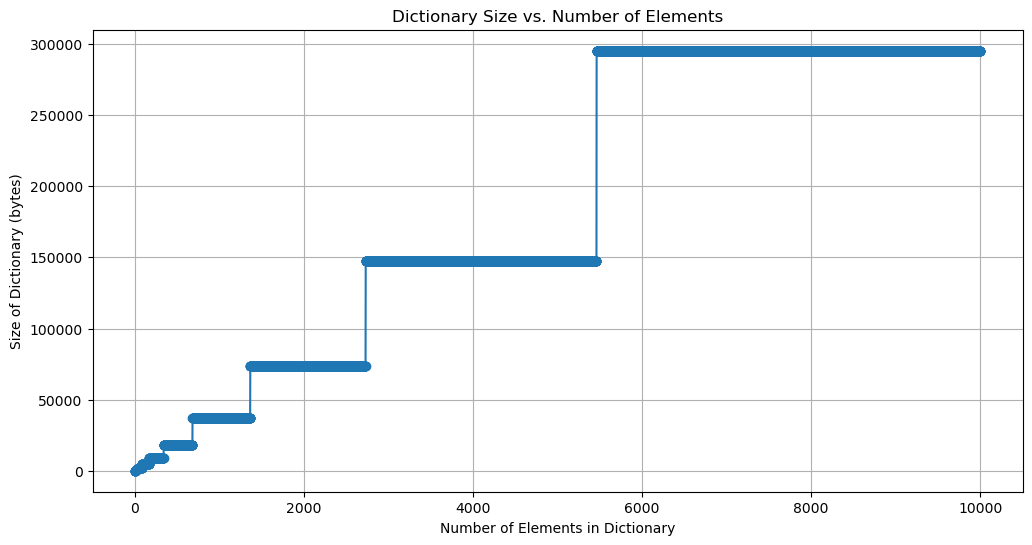

In [7]:
import sys
import matplotlib.pyplot as plt

# Initialize variables
dict_size = []
elements = []
d = {}

# Incrementally add elements to the dictionary and record size and number of elements
for i in range(10000):
    d[i] = None
    dict_size.append(sys.getsizeof(d))  # Record size for every new element
    elements.append(i)

# Plot the size of the dictionary vs. number of elements
plt.figure(figsize=(12, 6))
plt.plot(elements, dict_size, marker='o')
plt.xlabel('Number of Elements in Dictionary')
plt.ylabel('Size of Dictionary (bytes)')
plt.title('Dictionary Size vs. Number of Elements')
plt.grid(True)
plt.show()


The plot shows the size of a Python dictionary in bytes as more elements are added. The x-axis represents the number of elements in the dictionary, and the y-axis represents the size of the dictionary in bytes. From the plot, you can observe a series of jumps in the size of the dictionary, indicating where the underlying data structure expanded to accommodate more entries.

These growth points, where the dictionary's size increases, are the result of Python's dynamic array resizing algorithm at work. A Python dictionary uses a hash table internally, and when the table becomes too full (i.e., the load factor reaches a certain threshold), it must grow to maintain the performance guarantees of $O(1)$ average time complexity for insertions and lookups.

Python's dictionary implementation tries to balance between time efficiency and memory usage. The growth points are optimized such that the resizing operation doesn't happen too often (which would be time-inefficient) and doesn't consume too much memory without need (which would be memory-inefficient).

The results clearly illustrate that the memory size of a dictionary does not increase linearly with the number of elements but rather in larger increments at specific points. This information is useful for understanding the behavior of memory usage in Python applications that make heavy use of dictionaries.

## Exercise:

Now do the same experiment but with a `list` instead of a `dict`. Discuss your results.

**Answer:**

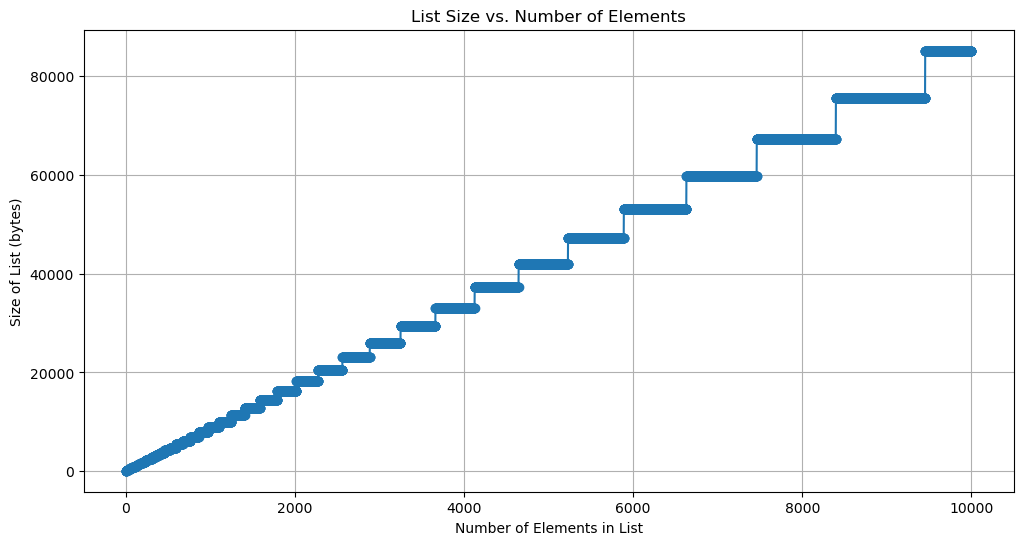

In [8]:
import sys
import matplotlib.pyplot as plt

# Initialize variables
list_size = []
elements = []
lst = []

# Incrementally add elements to the list and record size and number of elements
for i in range(10000):
    lst.append(None)
    list_size.append(sys.getsizeof(lst))  # Record size for every new element
    elements.append(i)

# Plot the size of the list vs. number of elements
plt.figure(figsize=(12, 6))
plt.plot(elements, list_size, marker='o')
plt.xlabel('Number of Elements in List')
plt.ylabel('Size of List (bytes)')
plt.title('List Size vs. Number of Elements')
plt.grid(True)
plt.show()


The plot shows the size of a Python list (in bytes) as the number of elements in the list increases. The plot illustrates a step-like growth pattern, which confirms the behavior of dynamic array resizing in Python lists.

As seen in the plot, the list size remains constant for a series of element additions, and then there is a noticeable jump in memory usage. This is indicative of the list's underlying array reaching its capacity and Python allocating more space to accommodate additional elements. The pattern is step-like rather than linear due to this allocation strategy. This step-like increase continues at regular intervals as the number of elements grows.

The results indicate that Python's list implementation uses an over-allocation strategy to manage growth. When the array backing the list needs to expand, it does so by allocating more space than is currently required. This "extra" space means that subsequent additions to the list do not require immediate reallocations. This strategy is efficient because it minimizes the need for costly memory reallocations as the list grows.

In summary, the behavior shown in the plot is crucial for understanding the performance characteristics of list operations. While appending to a list is generally an $O(1)$ operation, there are times when appending causes the list to grow, which is an $O(n)$ operation. However, because these operations are amortized over many append operations, they typically do not significantly impact the performance of list operations in the average case.

In [9]:
!jupyter nbconvert _02-py-searching-sorting-hash-practice-solutions.ipynb --to html --template classic --output 02-py-searching-sorting-hash-practice-solutions.html

[NbConvertApp] Converting notebook _02-py-searching-sorting-hash-practice-solutions.ipynb to html
[NbConvertApp] Writing 378312 bytes to 02-py-searching-sorting-hash-practice-solutions.html


# <center>Have fun!<a class="tocSkip"></center>